Thanks to: Sebastian Raschka (sraschka@wisc.edu)  



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Classroom/Aprendizaje profundo 2021 II/Lecture02/Notebooks'

/content/drive/.shortcut-targets-by-id/1ZGXf9fHB8zPdNbWyaFXRXARUlmncT3Uq/Aprendizaje profundo 2021 II/Lecture02/Notebooks


## Autograd Example

In [8]:
import torch
from torch.autograd import grad
import torch.nn.functional as F



In [9]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=73693f8257f0c1bbf0a07acfb4e179292d3412ea9cb0de54139289807288ba09
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [10]:
from torchviz import make_dot

Suppose we have the following function graph (this example is from the lecture slides):

![](images/relu-graph.png)

In PyTorch, the function is defined and computed as follows:

In [13]:
x = torch.tensor([-3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
a = F.relu(x*w + b)

In [14]:
a

tensor([0.], grad_fn=<ReluBackward0>)

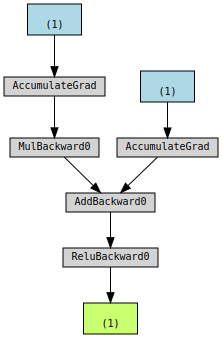

In [11]:
make_dot(a)

By default, PyTorch will automatically build a computation graph in the background if variables have the parameter `requires_grad=True` set. If new variables without that parameter set to `True` are used in a computation with a variable that has `requires_grad=True`, these new variables will also automatically have gradients set to `True` (this simply means that gradients for these variables will be computed; it is wasteful to set it to `True` if we don't need that variable's gradient; for example, we usually don't need the gradients of he training inputs `x`).

Let's compute the derivative of a with respect to w:

In [15]:
grad(a, w, retain_graph=True)

(tensor([-0.]),)

Above, the `retain_graph=True` means the computation graph will be kept in memory -- this is for example purposes so that we can use the `grad` function again below. In practice, we usually want to free the computation graph in every round.

In [16]:
grad(a, b)

(tensor([0.]),)

<br>
<br>

Note that PyTorch functions are usually more efficient, but we could also implement our own ReLU function as shown below:

In [17]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

def my_relu(z):
    if z > 0.:
        return z
    else:
        z[:] = 0.
        return z

a = my_relu(x*w + b)
grad(a, w)

(tensor([3.]),)

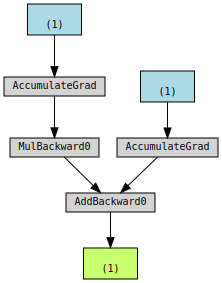

In [18]:
make_dot(a)

Note that even though the derivative of ReLU is not defined at 0, PyTorch autograd will do something that is reasonable for practical purposes:

In [ ]:
x = torch.tensor([-1.])
w = torch.tensor([1.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

def my_relu(z):
    if z > 0.:
        return z
    else:
        z[:] = 0.
        return z

a = F.relu(x*w + b)
grad(a, w, retain_graph=False)

(tensor([-0.]),)